# Avocado prices

### Nature and rationale of the data

> The `data` represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

## In this Notebook I have done the following tasks: 

#### Did Feature engineering to round off certain features and created new features like Day & Month.

#### Went in detail to  explore and visualize the data. Some important graphs in notebooks are:
* Avg.Price of Avocado by City,Total volume of Avocado sold by City.
* Avg.price of Avocado as per type, AvgPrice of avocado as per days of month, Total volume of avacado sold as per month.
* Pie graph to visualize volume distribution.

#### Used Facebook Prophet to predict the future average price of Avodaco.



## Some relevant columns in the dataset:

*  Date - The date of the observation
*  AveragePrice - the average price of a single avocado
*  type - conventional or organic
*  year - the year
*  Region - the city or region of the observation
*  Total Volume - Total number of avocados sold
*  4046 - Total number of avocados with PLU 4046 sold
*  4225 - Total number of avocados with PLU 4225 sold
*  4770 - Total number of avocados with PLU 4770 sold

## Step 1: Import all the libraries, load the dataset and have a first look at the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../input/avocado-prices/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## Step 2: Feature Engineering.

##### Chage the date column to datetime so this can be used as a time serise data. 

In [7]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

#### Luckily we dont have any null values which makes working with data easier.

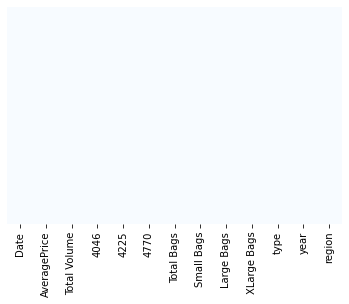

In [8]:
sns.heatmap(df.isnull(),cbar=False,cmap='Blues',yticklabels=False)

In [9]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

#### Rounding off certain columns as I find it more comfertable to work with rounded off values. This step can actually be skipped.

In [10]:
round_columns = df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [11]:
for i in round_columns.columns:
    df[i] = df[i].apply(np.round)

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64237.0,1037.0,54455.0,48.0,8697.0,8604.0,93.0,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54877.0,674.0,44639.0,58.0,9506.0,9408.0,97.0,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.0,795.0,109150.0,130.0,8145.0,8042.0,103.0,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.0,1132.0,71976.0,73.0,5811.0,5677.0,134.0,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51040.0,941.0,43838.0,76.0,6184.0,5986.0,198.0,0.0,conventional,2015,Albany


## Step 3: Exploratory Data Analysis

#### From the histogram of the data I see Avg Price has a very nice distribution. Hence I will plot that seprately in the next cell.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1ada2f610>,
      dtype=object)

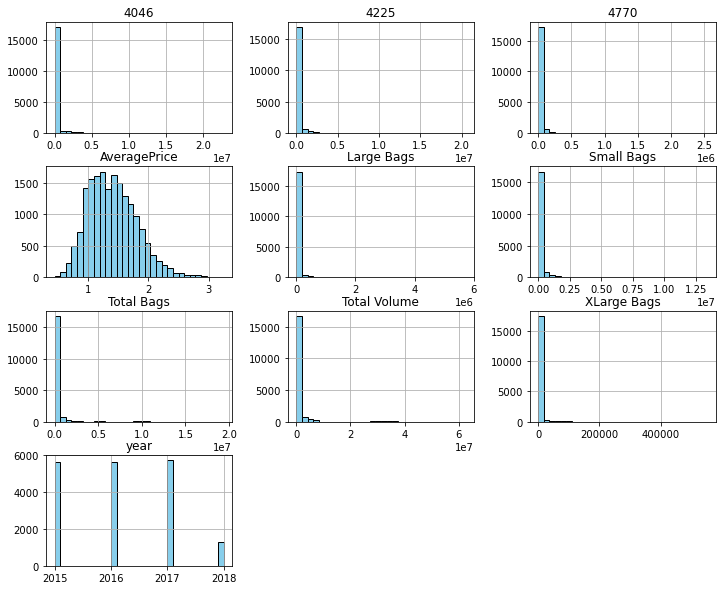

In [13]:
df.hist(bins=30,figsize=(12,10),color='skyblue',ec="black")

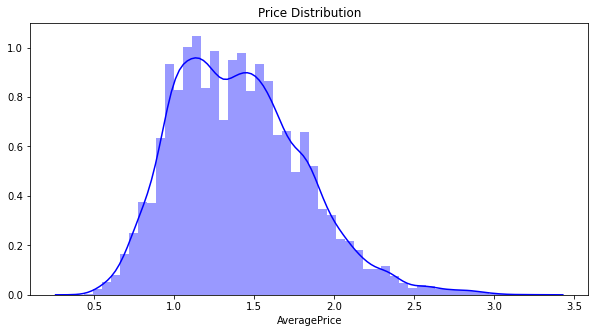

In [14]:
plt.figure(figsize=(10,5))
plt.title("Price Distribution")
ax = sns.distplot(df["AveragePrice"], color = 'b')

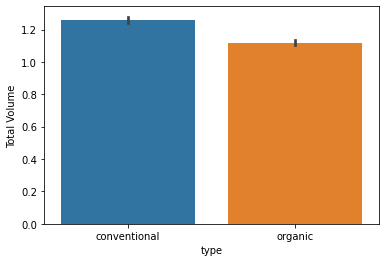

In [15]:
sns.barplot(x=df['type'],y=df['Total Volume'].value_counts())

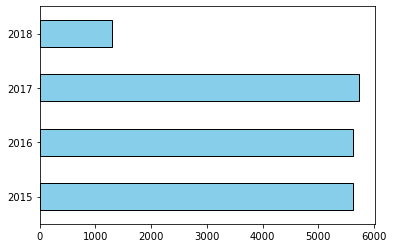

In [16]:
df.year.value_counts().sort_index().plot(kind='barh',figsize=(6,4),color='skyblue',ec='black')

#### It makes more sense to work with only cities rather then states. So I am going to remove all the states from the region column.

In [17]:
regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

43

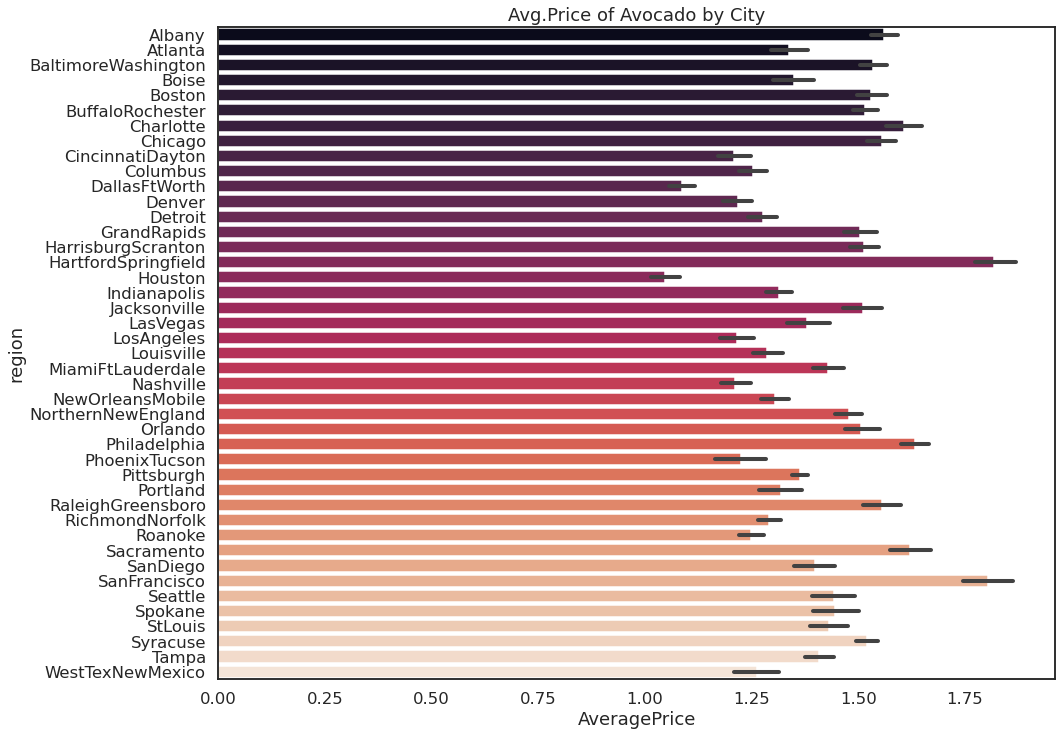

In [18]:
plt.figure(figsize=(15,12))
sns.set(style="white", context="talk")
plt.title("Avg.Price of Avocado by City")
sns.barplot(x="AveragePrice",y="region",data= df,palette="rocket")

# As seen avg price of avocado is the most in San Francisco & hartford springfield

#### As seen avg price of avocado is the most in San Francisco & hartford springfield

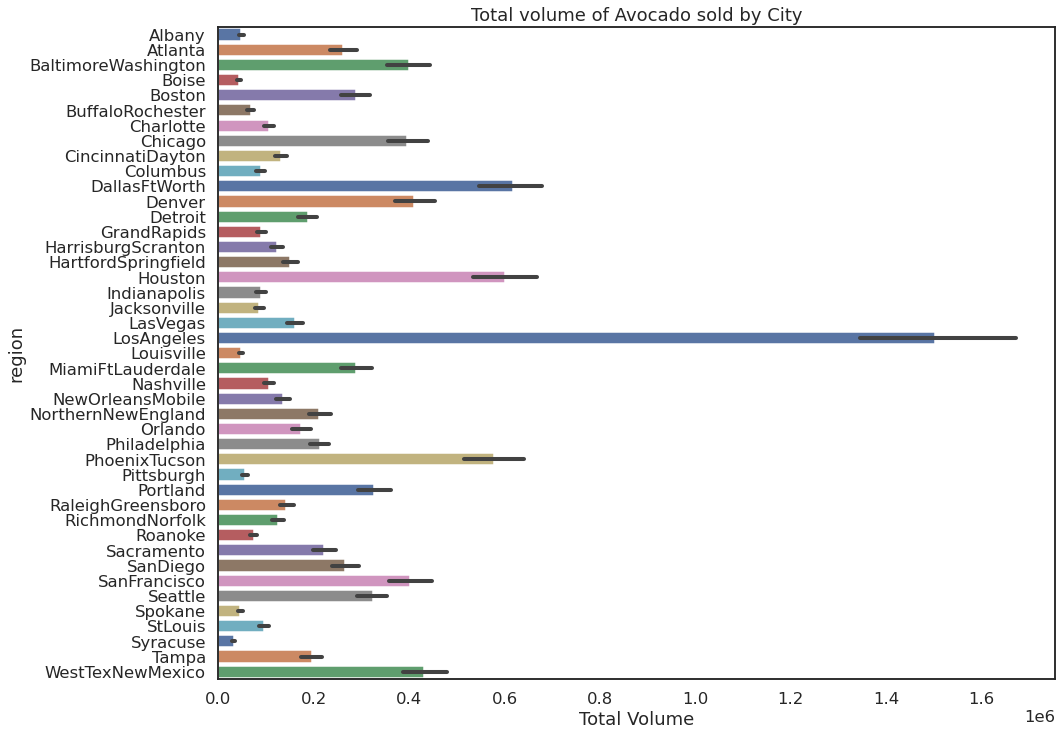

In [19]:
plt.figure(figsize=(15,12))
sns.set(style="white", context="talk")
plt.title("Total volume of Avocado sold by City")
sns.barplot(x="Total Volume",y="region",data= df,palette="deep")

#### Clearly LA is in love with avocados, one reason can be that Avg price of Avocado in LA is not very high.

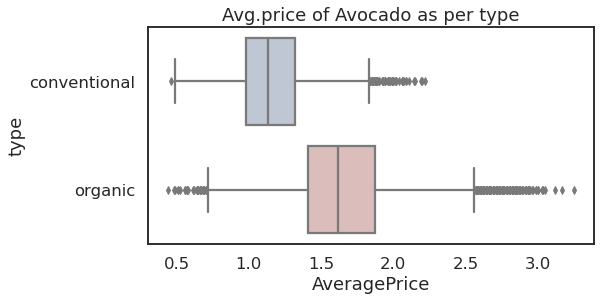

In [20]:
plt.figure(figsize=(8,4))
sns.set(style="white", context="talk")
plt.title("Avg.price of Avocado as per type")
sns.boxplot(x="AveragePrice",y="type",data= df,palette="vlag")

#### Organic surely are more expensive. 

In [21]:
# Making a new column 'Month'
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [22]:
df.head(1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64237.0,1037.0,54455.0,48.0,8697.0,8604.0,93.0,0.0,conventional,2015,Albany,12


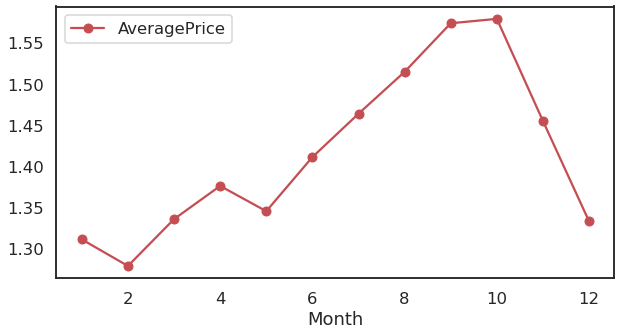

<Figure size 432x288 with 0 Axes>

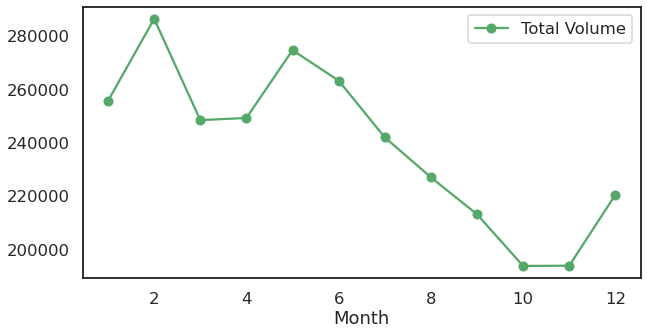

In [48]:
axis = df.groupby('Month')[['AveragePrice']].mean().plot(figsize=(10,5),marker='o',color='r')
plt.figure()
axis = df.groupby('Month')[['Total Volume']].mean().plot(figsize=(10,5),marker='o',color='g')

#### The above visual clearly shows that Avg Price of avocado has an affect on the sales. The sales are high when the Avg price is low and vice versa.

In [24]:
# Making a new column 'Day'.
df['Day'] = pd.DatetimeIndex(df['Date']).day

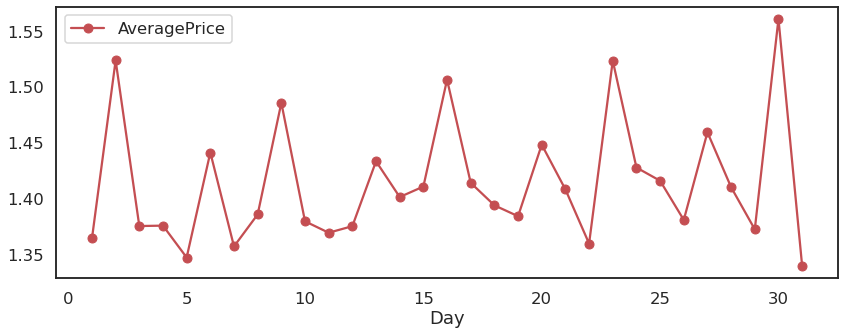

<Figure size 432x288 with 0 Axes>

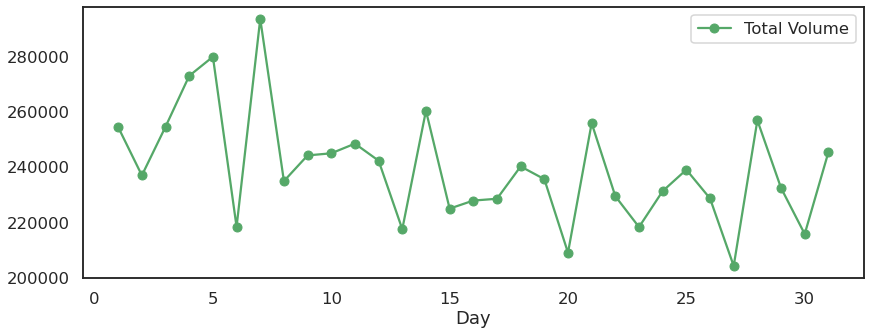

In [49]:
axis = df.groupby('Day')[['AveragePrice']].mean().plot(figsize=(14,5),marker='o',color='r')
plt.figure()
axis = df.groupby('Day')[['Total Volume']].mean().plot(figsize=(14,5),marker='o',color='g')

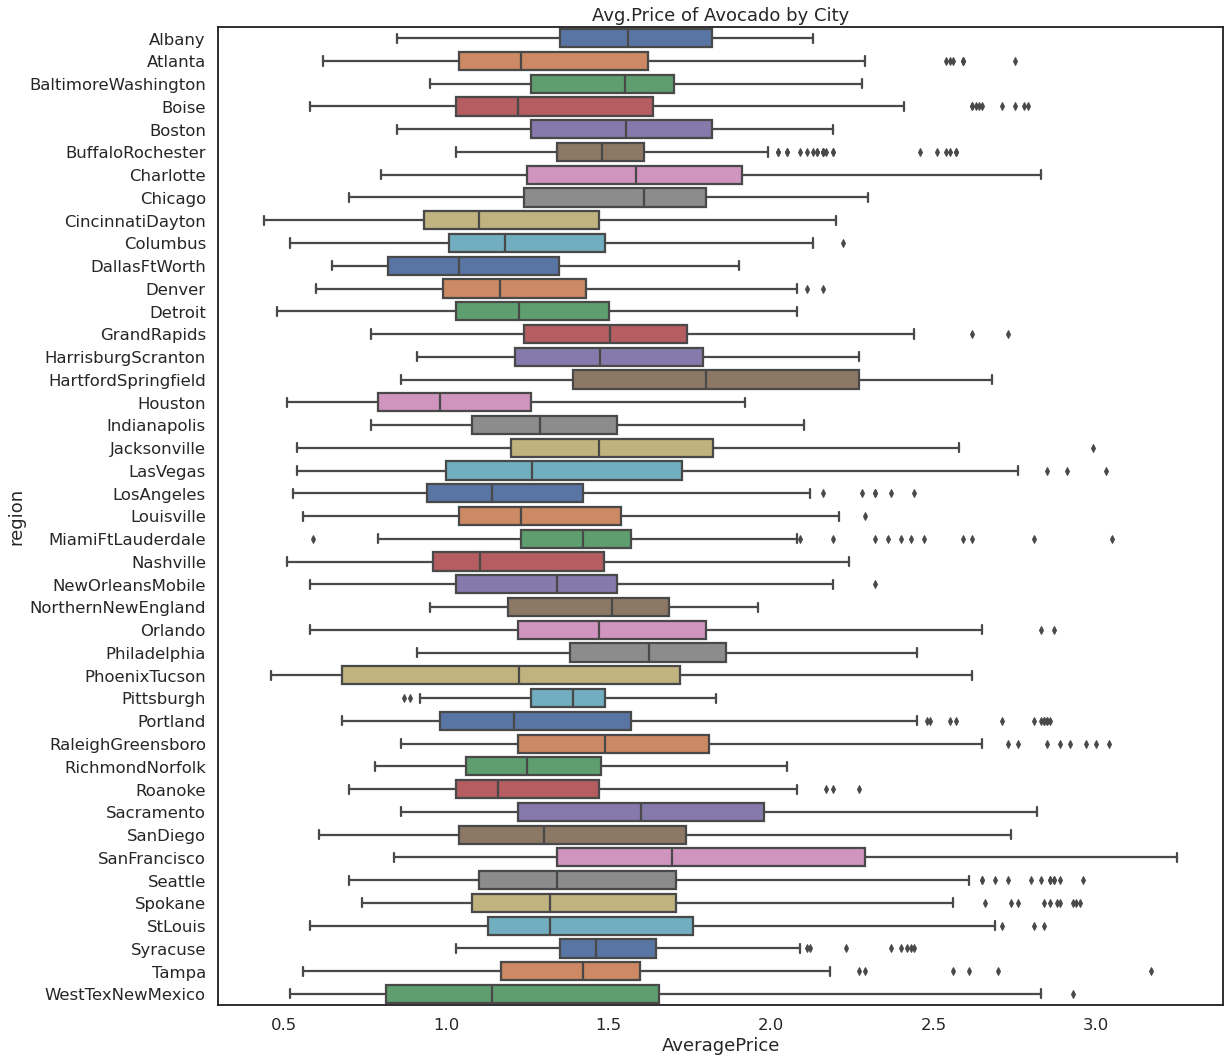

In [26]:
plt.figure(figsize=(18,18))
sns.set(style="white", context="talk")
plt.title("Avg.Price of Avocado by City")
sns.boxplot(x="AveragePrice",y="region",data= df,palette="deep")

#### As we can see above Houston clearly has the cheapest avocados but the record cheapest price at one time was recoreded in PhoenixTucson

#### Avg price of avocado over time as per types.

Text(0.5, 1.0, 'Avg Price of avocado as per type on avocado over time')

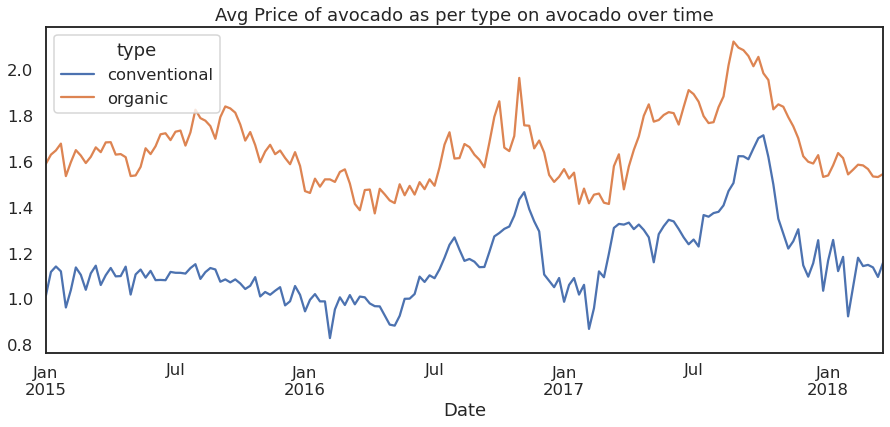

In [27]:
fig,ax = plt.subplots(figsize=(15,6))
df.groupby(['Date','type']).mean()['AveragePrice'].unstack().plot(ax=ax)
plt.title('Avg Price of avocado as per type on avocado over time')

#### Total volume of avocado sold over time as per types.

Text(0.5, 1.0, 'Total volume of avocado sold as per type on avocado over time')

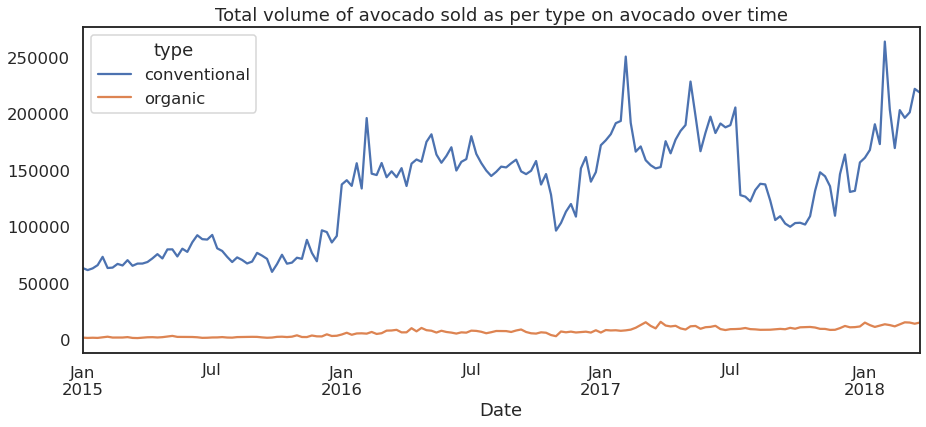

In [28]:
fig,ax = plt.subplots(figsize=(15,6))
df.groupby(['Date','type']).mean()['Total Bags'].unstack().plot(ax=ax)
plt.title('Total volume of avocado sold as per type on avocado over time')

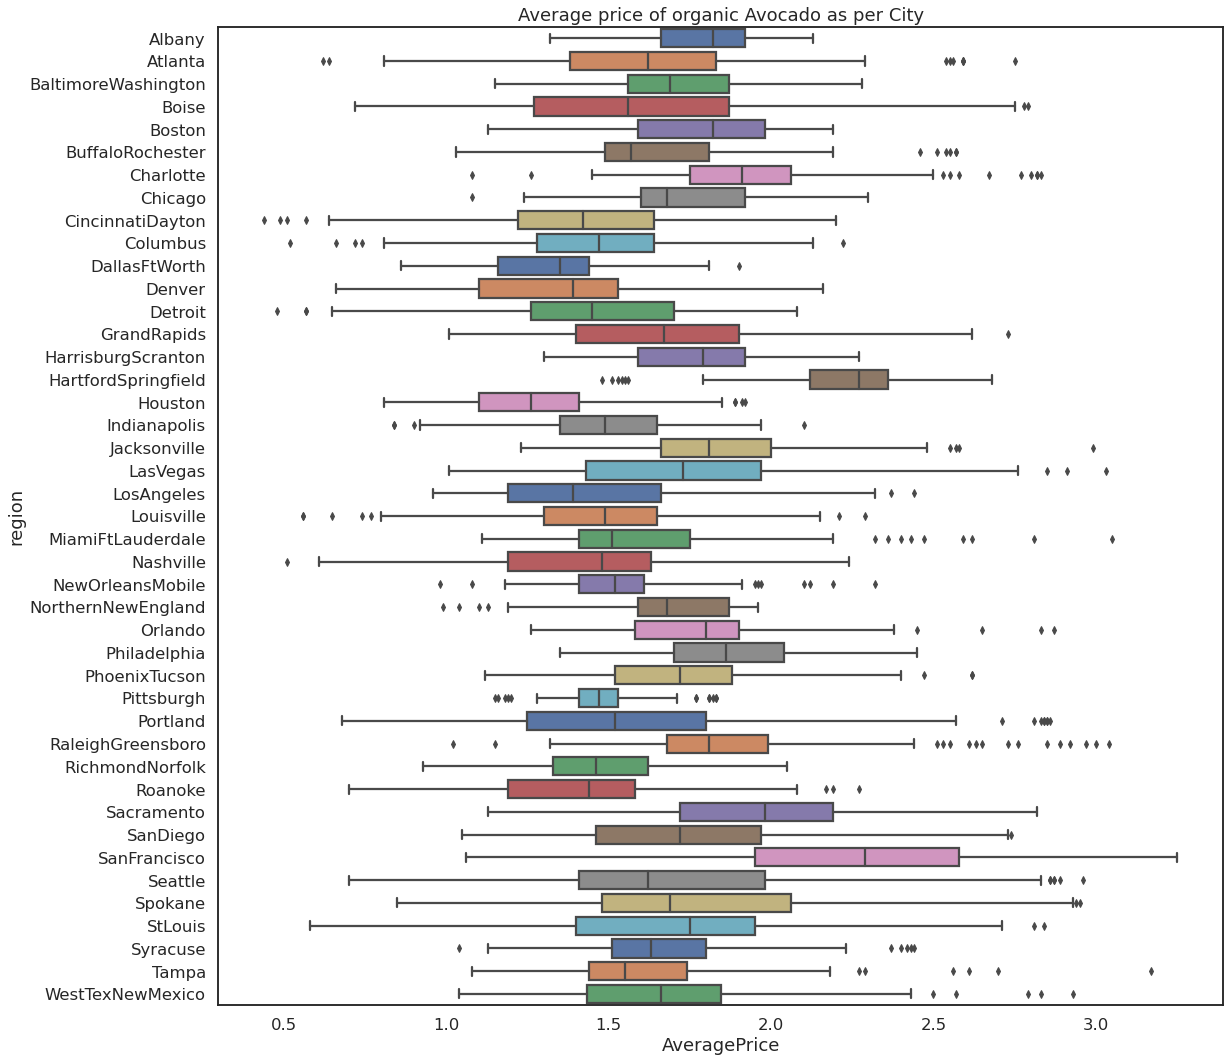

In [29]:
avacado_type = df['type']=='organic'
plt.figure(figsize=(18,18))
sns.set(style="white", context="talk")
plt.title("Average price of organic Avocado as per City")
sns.boxplot(x="AveragePrice",y="region",data= df[avacado_type],palette="deep")

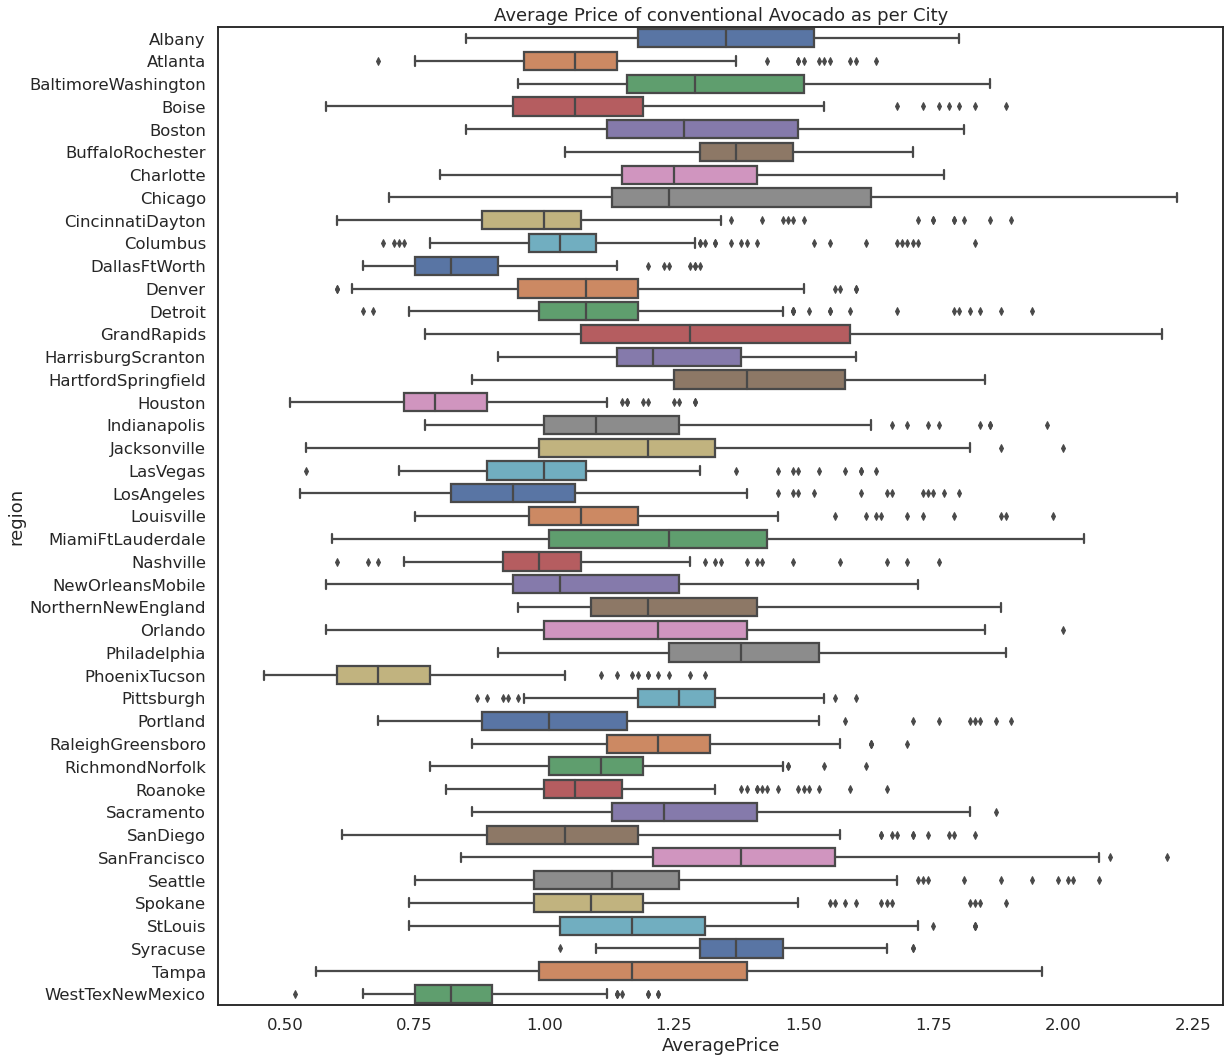

In [30]:
avacado_type = df['type']=='conventional'
plt.figure(figsize=(18,18))
sns.set(style="white", context="talk")
plt.title("Average Price of conventional Avocado as per City")
sns.boxplot(x="AveragePrice",y="region",data= df[avacado_type],palette="deep")

#### As seen from above 2 graphs. Houston has the cheapest organic avocados whereas conventional are the cheapest at PhoenixTucson.

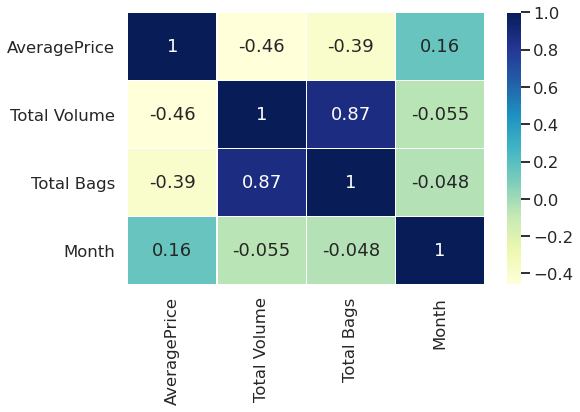

In [31]:
df_corr = df[['AveragePrice','Total Volume','Total Bags','Month']]
correlations = df_corr.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlations,annot=True,cmap="YlGnBu",linewidths=.5)
# Month has a very good correlation with AvgPrice.

### Selecting important volume features to draw pie charts to see the volume distribution.

In [32]:
df_to_plot = df.drop(['Date','AveragePrice', 'Total Volume', 'Total Bags','type','region','Month','Day'], axis = 1).groupby('year').agg('sum')
df_to_plot.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,395683541.0,381679410.0,34551084.0,142456523.0,28409947.0,1324207.0
2016,337353672.0,368440932.0,37822279.0,263075645.0,80734588.0,4894967.0
2017,366792159.0,340507863.0,22968988.0,281195638.0,93246233.0,5384106.0
2018,101359165.0,89638652.0,5804439.0,79205505.0,28310125.0,1589370.0


Text(0, 0.5, '')

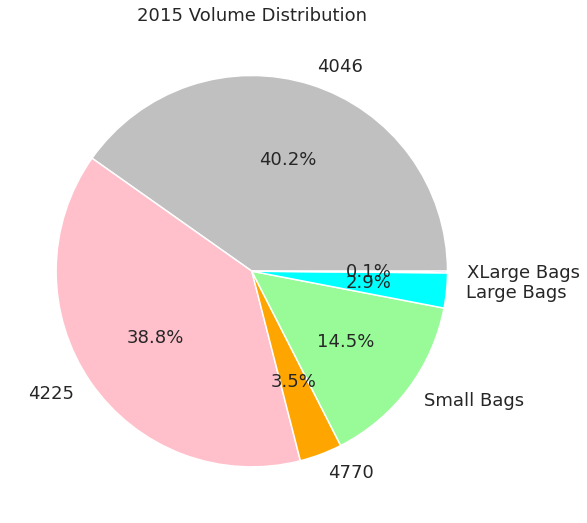

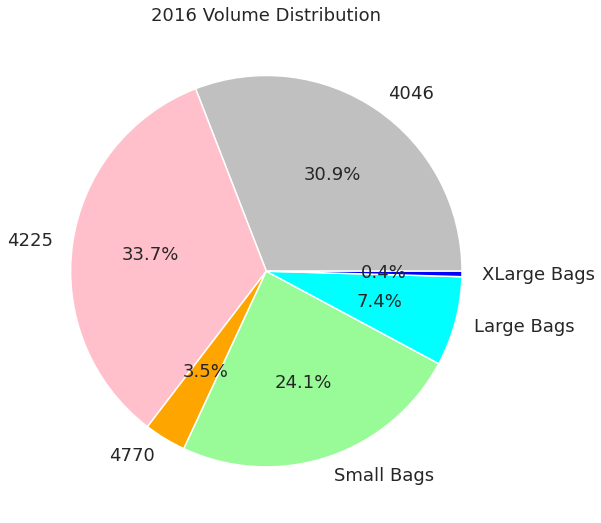

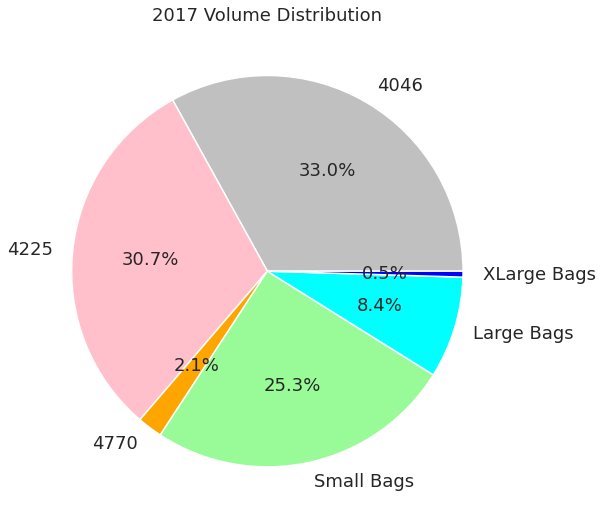

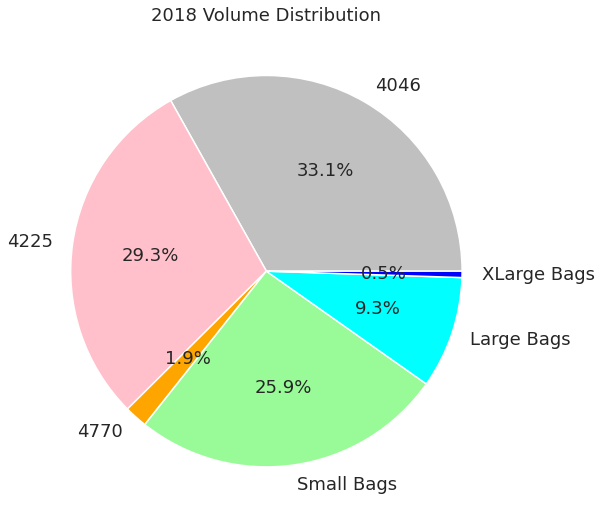

In [33]:
index = ['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
series = pd.DataFrame({'2015': df_to_plot.loc[[2015],:].values.tolist()[0],
                      '2016': df_to_plot.loc[[2016],:].values.tolist()[0],
                      '2017': df_to_plot.loc[[2017],:].values.tolist()[0],
                      '2018': df_to_plot.loc[[2018],:].values.tolist()[0]}, index=index)
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

## Step 4: Avg avocado price perdiction using Facebook Prophet.

In [34]:
from fbprophet import Prophet

In [35]:
df_pr = df.copy()

In [36]:
df_pr = df_pr[['Date', 'AveragePrice']].rename(columns = {'Date': 'ds', 'AveragePrice':'y'})

In [37]:
train_data_pr = df_pr.iloc[:len(df)-30]
test_data_pr = df_pr.iloc[len(df)-30:]

In [38]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=30,freq='MS')
prophet_pred = m.predict(future)

In [39]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14526,2020-05-01,0.888595,0.128131,1.504347,0.439744,1.362412,-0.081243,-0.081243,-0.081243,-0.081243,-0.081243,-0.081243,0.0,0.0,0.0,0.807352
14527,2020-06-01,0.866836,0.178793,1.509128,0.394041,1.362963,-0.019944,-0.019944,-0.019944,-0.019944,-0.019944,-0.019944,0.0,0.0,0.0,0.846892
14528,2020-07-01,0.845780,0.153507,1.617240,0.346968,1.368760,0.000969,0.000969,0.000969,0.000969,0.000969,0.000969,0.0,0.0,0.0,0.846749
14529,2020-08-01,0.824021,0.135953,1.637141,0.295103,1.376204,0.069200,0.069200,0.069200,0.069200,0.069200,0.069200,0.0,0.0,0.0,0.893221
14530,2020-09-01,0.802263,0.150156,1.695753,0.237930,1.379934,0.136397,0.136397,0.136397,0.136397,0.136397,0.136397,0.0,0.0,0.0,0.938660


In [40]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-30:]['ds'], "Pred" : prophet_pred[-30:]["yhat"]})

In [41]:
prophet_pred = prophet_pred.set_index("Date")

In [42]:
prophet_pred.index.freq = "MS"

In [43]:
test_data_pr["Prophet_Predictions"] = prophet_pred['Pred'].values

In [44]:
test_data_pr = test_data_pr.set_index("ds")

### Comparing Prophet's predicions with the original. 

In [45]:
test_data_pr.head(10)

,y,Prophet_Predictions
ds,,
2018-02-11,1.23,1.362686
2018-02-04,1.22,1.320786
2018-01-28,1.19,1.358998
2018-01-21,1.27,1.358665
2018-01-14,1.25,1.405620
2018-01-07,1.25,1.451328
2018-03-25,1.41,1.498466
2018-03-18,1.50,1.384638
2018-03-11,1.31,1.234382


In [46]:
test_data_pr.tail(10)

,y,Prophet_Predictions
ds,,
2018-03-11,1.56,0.979401
2018-03-04,1.54,0.861139
2018-02-25,1.57,0.801786
2018-02-18,1.56,0.844130
2018-02-11,1.57,0.850985
2018-02-04,1.63,0.807352
2018-01-28,1.71,0.846892
2018-01-21,1.87,0.846749
2018-01-14,1.93,0.893221


### Visualising the comparision between Prophet's prediction with the actual price. Blue is the Prophets prediction and red is the actual price.

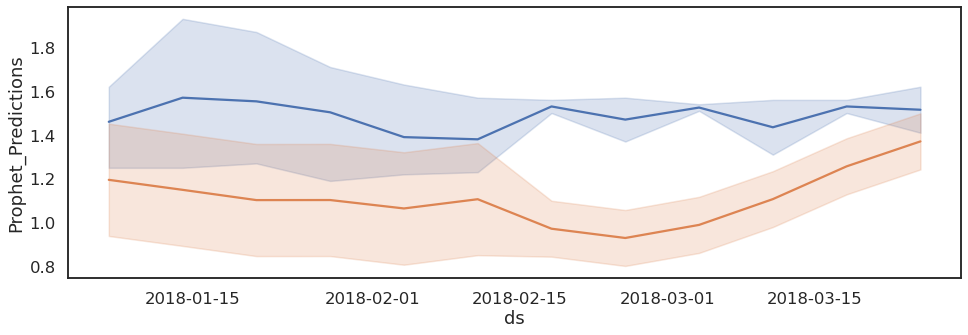

In [47]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data_pr.index, y=test_data_pr["y"])
sns.lineplot(x=test_data_pr.index, y = test_data_pr["Prophet_Predictions"]);

## Conclusion.

#### I was able to get some really nice visualizations and comparison graphs. I tried to look through the data left, right and centre. The first 3 steps went smooth. But in the last step I was not able to get very accurate predictions using Facebook Prophet. I will try to come back to my notebook and make changes in last step. Also I would like to try LSTM & ARIMA for my future tasks. It would be nice to compare the results of all 3 then.
#### As of now I would like to conclude here. 
#### If you have gone through my work and found it good please upvote. Anyone can copy and edit my notebook. It would be amazing to get some suggestions.

#### One can find my more notebooks and work here: https://www.kaggle.com/vikasbhadoria/notebooks

### Thank you